<a href="https://colab.research.google.com/github/Harish090904/Harish090904/blob/main/diabetic_ulcer_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install opencv-python-headless
!pip install tensorflow


In [13]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# Import necessary libraries
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import drive  # Import for Google Drive access

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define Dataset Paths and Parameters
data_dir = "/content/drive/My Drive/thermal/images"  # Update the path to your dataset
categories = ["No_Ulcer", "Mild_Ulcer", "Severe_Ulcer"]  # Folder names for each class
IMG_SIZE = 224  # Image size (224x224)
data = []
labels = []

# Step 3: Data Preprocessing (Load, Resize, Normalize)
print("Loading and Preprocessing Images...")
for category in categories:
    path = os.path.join(data_dir, category)  # Path to class folder
    label = categories.index(category)  # Assign numerical labels (0, 1, 2)

    for img_file in os.listdir(path):
        try:
            img_path = os.path.join(path, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
            img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize to 224x224
            img_normalized = img_resized / 255.0  # Normalize pixel values
            data.append(img_normalized)
            labels.append(label)
        except Exception as e:
            print(f"Error loading image {img_file}: {e}")

# Step 4: Convert Data to NumPy Arrays
data = np.array(data).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # Add channel dimension
labels = to_categorical(np.array(labels), num_classes=len(categories))  # One-hot encode labels

# Step 5: Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("Data Shapes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

# Step 6: Define the CNN Model
print("Building the CNN Model...")
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')  # Output layer for classification
])

# Step 7: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 8: Model Training
print("Training the Model...")
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)  # Early stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping]
)

# Step 9: Evaluate the Model
print("Evaluating the Model...")
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 10: Save the Trained Model
model_save_path = "/content/drive/My Drive/thermal/diabetic_ulcer_model.h5"
model.save(model_save_path)
print(f"Model saved at: {model_save_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading and Preprocessing Images...
Error loading image corns2.gif: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Error loading image internetSet: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Error loading image samples: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Error loading image Wound Images: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Error loading image Wound Images2: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Error loading ima

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.4628 - loss: 1.3746 - val_accuracy: 0.5992 - val_loss: 0.9511
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.6468 - loss: 0.8677 - val_accuracy: 0.6761 - val_loss: 0.8702
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.6904 - loss: 0.8029 - val_accuracy: 0.7166 - val_loss: 0.7372
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7431 - loss: 0.6469 - val_accuracy: 0.7247 - val_loss: 0.7256
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.7669 - loss: 0.6223 - val_accuracy: 0.6883 - val_loss: 0.7883
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.7937 - loss: 0.5695 - val_accuracy: 0.7652 - val_loss: 0.6728
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.7741 - loss: 0.5643 - val_accuracy: 0.7692 - val_loss: 0.6542
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.8133 - loss: 0.4921 - val_accuracy: 0.7206 - val_loss:

Test Accuracy: 85.43%
Model saved at: /content/drive/My Drive/thermal/diabetic_ulcer_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8598 - loss: 0.5472
Test Accuracy: 85.43%
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 507ms/step
              precision    recall  f1-score   support

    No_Ulcer       0.93      0.96      0.94       113
  Mild_Ulcer       1.00      0.36      0.53        39
Severe_Ulcer       0.76      0.94      0.84        95

    accuracy                           0.85       247
   macro avg       0.90      0.75      0.77       247
weighted avg       0.88      0.85      0.84       247



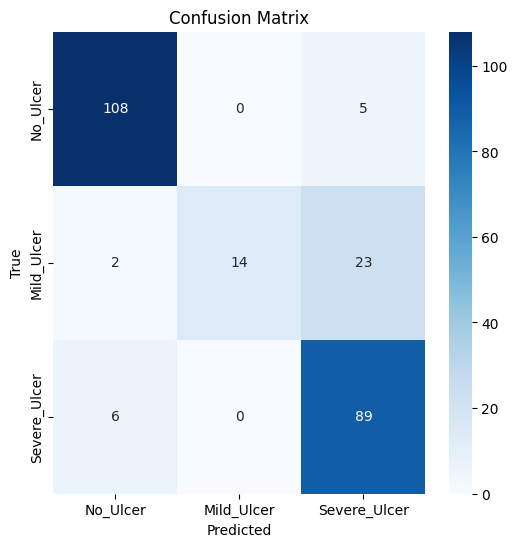

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=categories))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
"""
from flask import Flask

app = Flask(__name__)

@app.route('/')
def home():
    return "Hello, Flask!"

if __name__ == '__main__':
    app.run(debug=True)
"""
